<h1>Machine learning problem<h1>

**Breif Description :**
![image](https://user-images.githubusercontent.com/62200958/125176380-8eda3d80-e1f0-11eb-8ae9-03bd9776fa0a.png)


Quora is a platform for learning and sharing information. It's a place where we can ask questions and get responses from people who have unique perspectives and answers.With over 100 million monthly users on Quora, it's no wonder that many individuals ask similar questions. Many questions with the same objective can lead people spending more time looking for the best solution to their Query, as well as writers feeling obligated to respond to multiple variations of the same question. so,this machine learning model can find similar questions and sloves our query with no time.

<h4>Problem Statement :</h4>
- Identifying the questions asked on Quora wethear they are duplicates of questions that have already been asked.<br>
- This could be useful to instantly provide answers to questions that have already been answered.<br> 
- Ml model predicits whether given  pair of questions are duplicates or not.<br> 

In [2]:
#importing useful libraries
import math
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go
sns.color_palette('bright')
sns.set(style='darkgrid',rc = {'figure.figsize':(15,8)})
from plotly.offline import iplot
from sklearn.pipeline import make_pipeline 
%matplotlib inline
print("Ready,set,go....")

Ready,set,go....


In [3]:
#getting the path
print(os.getcwd())

C:\Users\saiabhiteja\Desktop\quora-question-pairs


<h2>1.DATA OVERVEIW <h2>

<p> 
        
    1.Data is loaded from train.csv file
    
    2.Data contains 5 Feautres
            - id : The id of a training set question pair
            - qid1, qid2 : Unique ids of for each question
            - question1, question2 : The full text of each question asked
            - is_duplicate : The target variable, set to 1 if question1 and question2 are similar else set to 0
    
     3.Data contains 404290 rows.
</p>

In [4]:
#reading training data set
df = pd.read_csv('train.csv\\train.csv')

In [5]:
#checking head
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
#describing the data
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


<h2>1.1 Cleaning The Data</h2>

<p>
    - plotting graphs with data<br>
    - checking for Null values<br>
    - filling Null values with appropriate values<br>
</p>

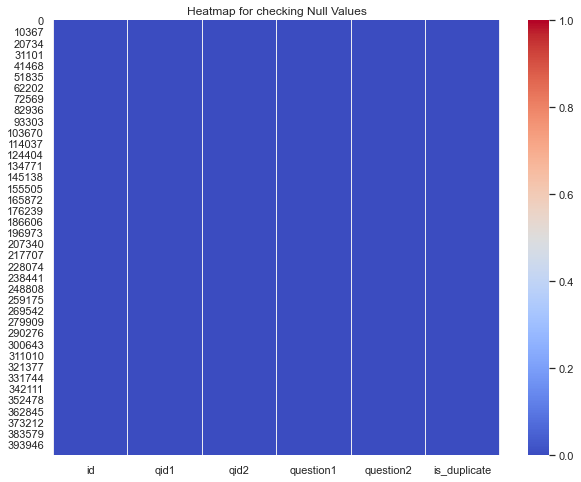

In [8]:
#checking for null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='coolwarm')
plt.title('Heatmap for checking Null Values')
plt.show()

In [10]:
#Checking for  rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [11]:
# Filling the null values with space ' '
df = df.fillna('')

In [12]:
#checking for any null rows
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


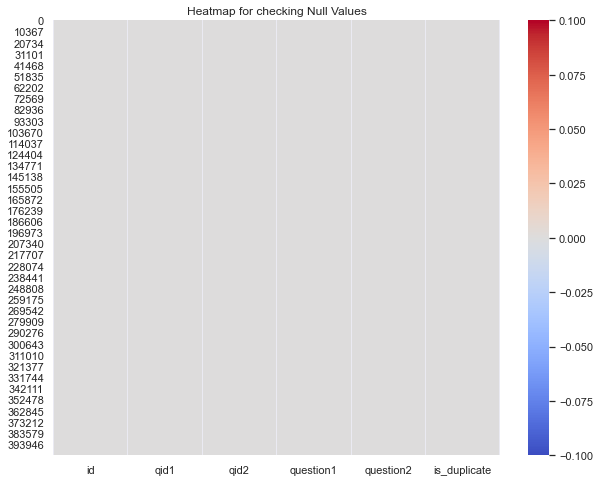

In [13]:
#checking for null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='coolwarm')
plt.title('Heatmap for checking Null Values')
plt.show()

In [14]:
#rechecking the data for null values
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404290 non-null  object
 4   question2     404290 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [15]:
#describing the data
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


<h2>1.2 plots </h2>

<p>
    - plotting graphs for understanding the given data<br>
    - using seaborn ,matplotlib.pyplot,autoviz,pandas_profiling
</p>

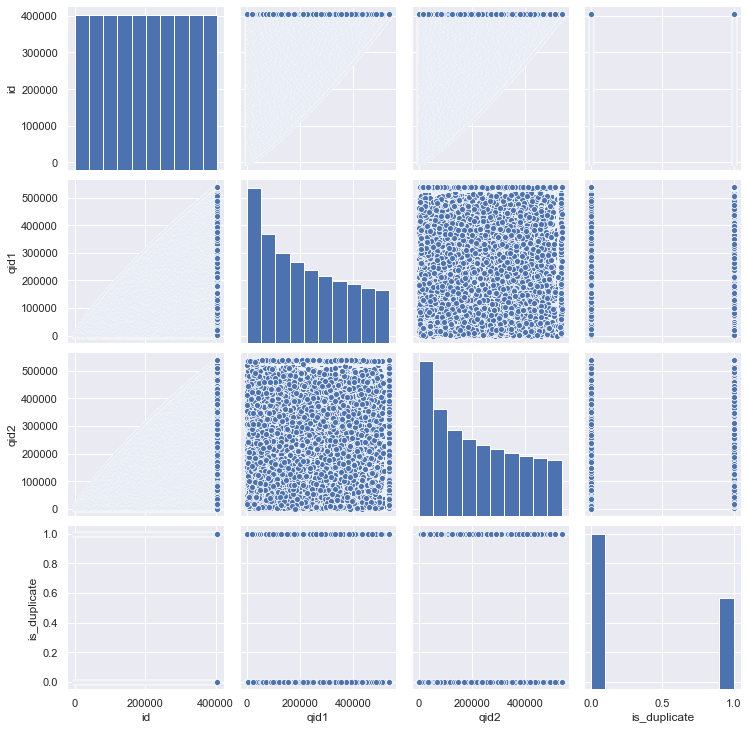

In [22]:
#using pairplot for finding the relations across all different features
sns.pairplot(df,palette='Set2')

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
    max_rows_analyzed is smaller than dataset shape 404290...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1

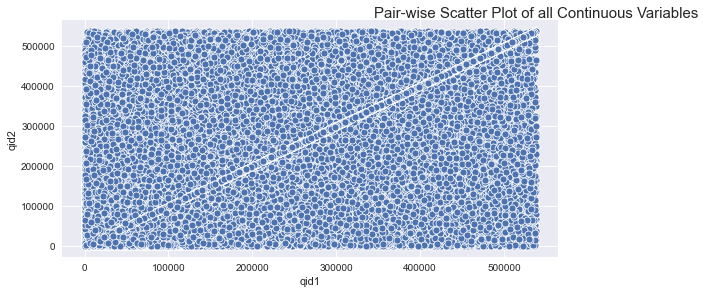

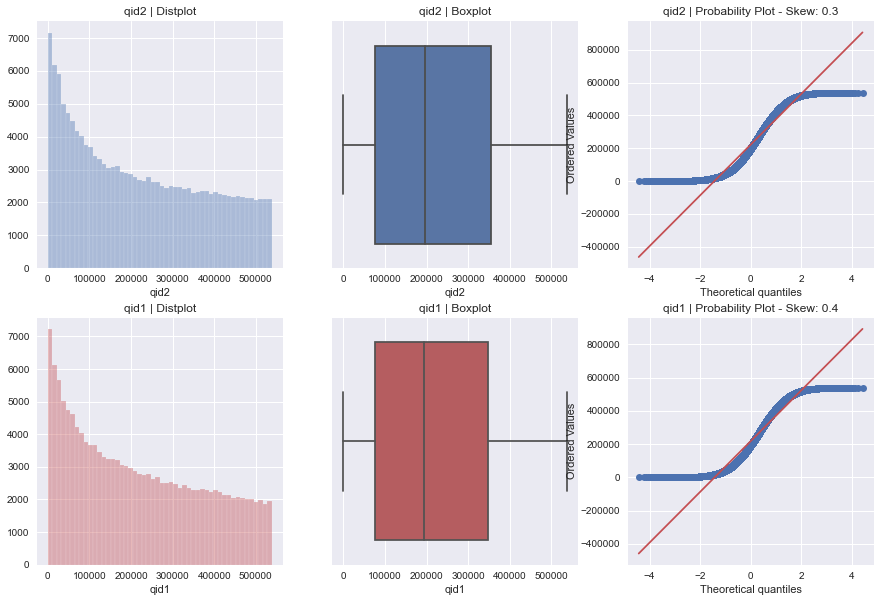

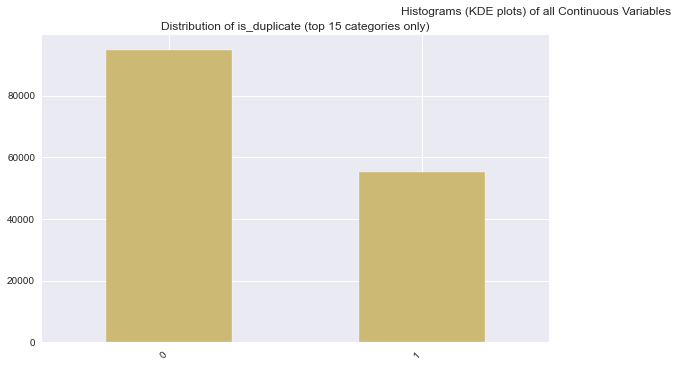

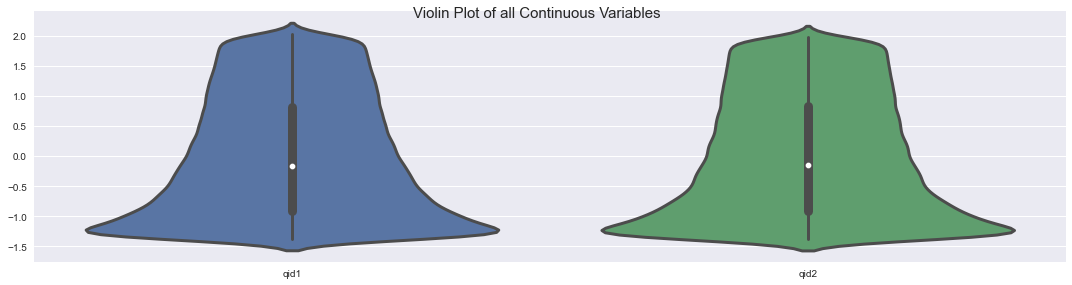

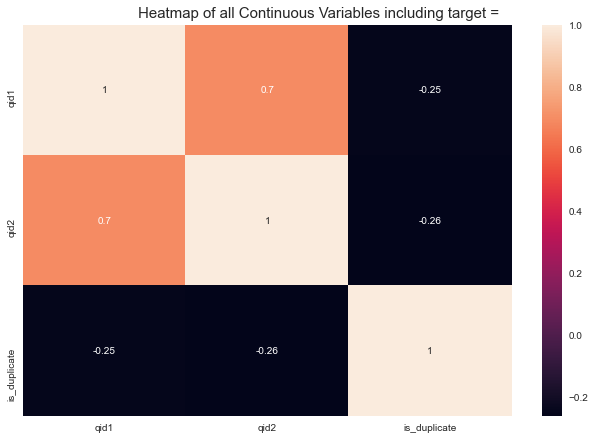

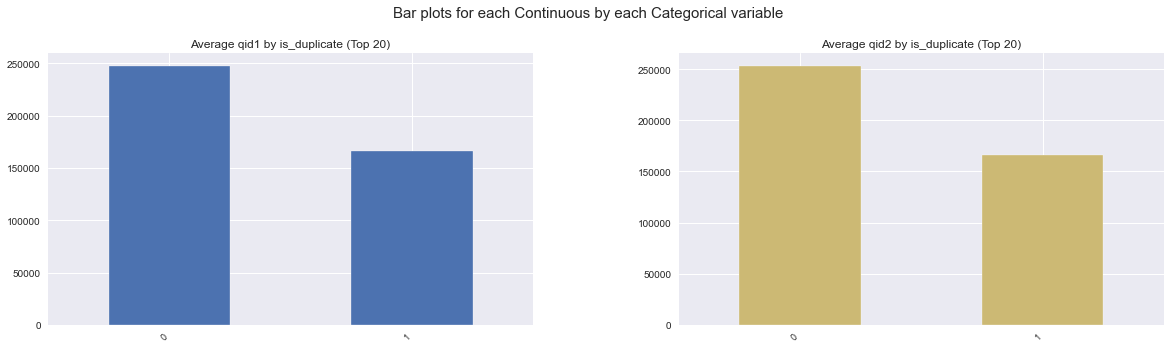

Time to run AutoViz (in seconds) = 12.022

 ###################### VISUALIZATION Completed ########################


In [27]:
#creating plots using autoviz
#importing Autoviz class from autoviz module
from autoviz.AutoViz_Class import AutoViz_Class
#Instantiate the AutoViz class
AV = AutoViz_Class()
pp = AV.AutoViz('train.csv\\train.csv')

In [30]:
#creating plots using pandas_profiling
import pandas_profiling as pp
pp.version.__version__

'3.0.0'

In [32]:
from pandas_profiling import ProfileReport
#using minimal report for genrating the html file faster for large datas
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="output_min.html")

Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<h3>1.2.1understanding target variable</h3>

In [57]:
#checking is_duplicate values
df['is_duplicate'].describe()

count    404290.000000
mean          0.369198
std           0.482588
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_duplicate, dtype: float64

In [58]:
#unique values
df['is_duplicate'].nunique()

2

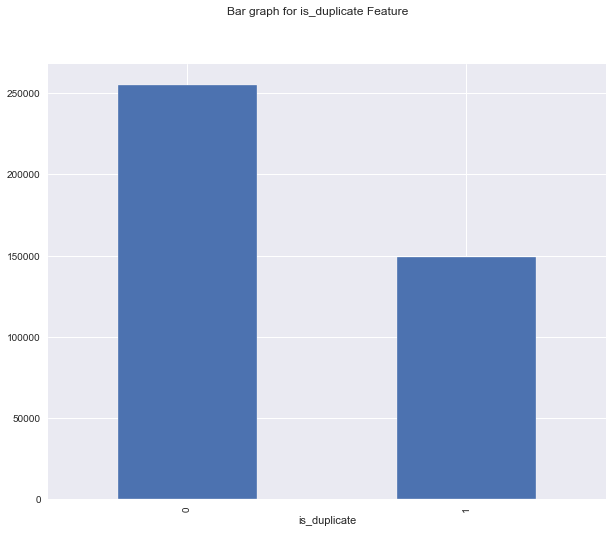

In [33]:
#checking the is_duplicate feature in training data
plt.figure(figsize=(10,8))
df.groupby("is_duplicate")['id'].count().plot.bar()
plt.suptitle('Bar graph for is_duplicate Feature')
plt.show()


<h3>1.2.2 Understanding question 1,2 variables </h3>

In [36]:
#checking question pairs
df['question1'].describe()

count                                    404290
unique                                   290457
top       How do I improve my English speaking?
freq                                         50
Name: question1, dtype: object

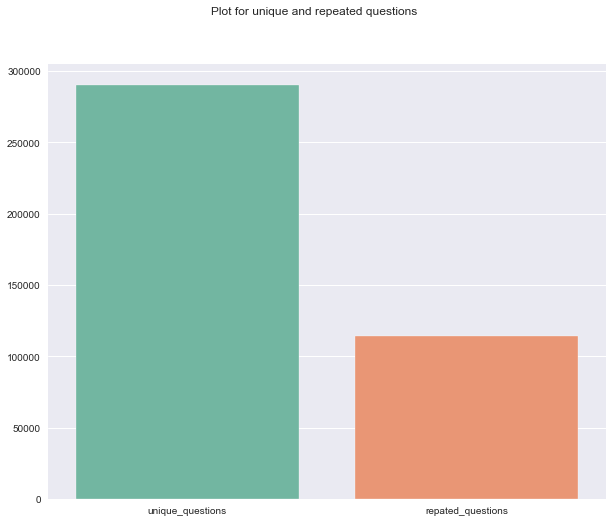

In [39]:
#plot for unqiue and repated question1
plt.figure(figsize=(10, 8))
plt.suptitle ("Plot for unique and repeated questions  ")
sns.barplot(['unique_questions','repated_questions'],[290457,404290-290457],palette='Set2')
plt.show()

In [40]:
#checking quetion pairs
df['question2'].describe()

count                                                404290
unique                                               299175
top       How can you look at someone's private Instagra...
freq                                                    120
Name: question2, dtype: object

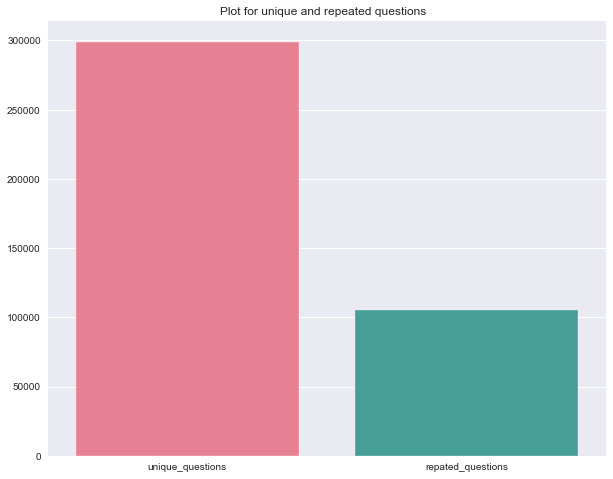

In [41]:
#plot for unqiue and repated question1
plt.figure(figsize=(10, 8))
plt.title ("Plot for unique and repeated questions  ")
sns.barplot(['unique_questions','repated_questions'],[299175,404290-299175],palette='husl')
plt.show()

In [42]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0



<h3>1.2.3 understanding qid1,2 variables</h3>


In [43]:
#describing the variable
df['qid1'].describe()

count    404290.000000
mean     217243.942418
std      157751.700002
min           1.000000
25%       74437.500000
50%      192182.000000
75%      346573.500000
max      537932.000000
Name: qid1, dtype: float64

In [44]:
#checking the unique values
df['qid1'].nunique()

290654

In [46]:
#describing the variable
df['qid2'].describe()

count    404290.000000
mean     220955.655337
std      159903.182629
min           2.000000
25%       74727.000000
50%      197052.000000
75%      354692.500000
max      537933.000000
Name: qid2, dtype: float64

In [47]:
#checking the unique values
df['qid2'].nunique()

299364

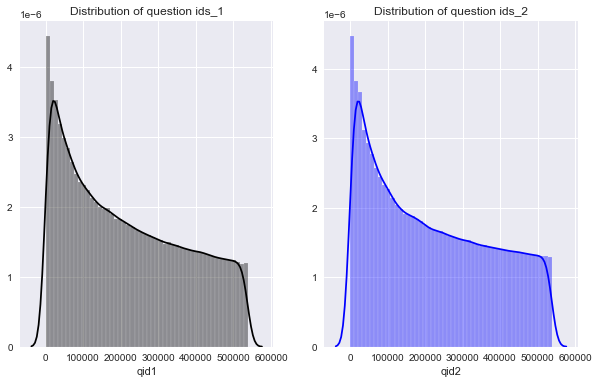

In [56]:
#seeing distrubution of qid1 and qid2
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['qid1'],label='qid1',color='black')
plt.title("Distribution of question ids_1")
plt.subplot(1,2,2)
sns.distplot(df['qid2'],label='qid2',color='blue')
plt.title("Distribution of question ids_2")
plt.show()